In [1]:
#Purpose of this code is to do k Nearest neighbors on data set of songs
# where some songs are a part of a playlist(cluster) and the other songs are not
# on the playlist. A result of a 1 in the kNN algorithm means that the song 
# should be on a playlist. If the song was not already on the playlist then a 
# result of 1 would mean that song is a recommended song. 

#IMPORTANT: input personal client id and client secret for code to work
#IMPORTANT: may have to change dataset path to be accurate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import spotipy

from spotipy.oauth2 import SpotifyOAuth

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='client_id',
                                               client_secret='client_secret',
                                               redirect_uri='http://localhost:8080/callback',
                                               scope='playlist-read-private'))

#Load 1000 playlist dataset
dataset = json.load(open('playlist_data/sampledata/mpd.slice.0-999.json'))
df = pd.DataFrame(dataset["playlists"])

#Load my playlists
user_playlists = sp.current_user_playlists()
my_dataset = pd.DataFrame(user_playlists)

#code to access song from playlist, first index is 0th playlist and second index is 0th song
Lose_Control_Song = sp.audio_features(df.tracks[0][0]['track_uri'])


In [2]:
#make list of all songs in all playlists
all_songs = []
for i in df.index:
    for j in range(df.num_tracks[i]):
        all_songs.append(
            df.tracks[i][j]
        )
all_songs_df = pd.DataFrame(all_songs)

In [4]:
#training set, first 52 entries are  the first playlist
on_playlist = all_songs_df.head(52).copy()
off_playlist = all_songs_df.tail(100).copy()

#audio features dataframe
aud_feat_on_play = pd.DataFrame(sp.audio_features(on_playlist['track_uri']))
aud_feat_off_play = pd.DataFrame(sp.audio_features(off_playlist['track_uri']))

#playlist and non playlist indicator
aud_feat_on_play['binary']=1
aud_feat_off_play['binary']=0

#concatenate playlists with the corresponding 1 entry for playlist and 0 for everything else
aud_feat = pd.concat([aud_feat_on_play,aud_feat_off_play],ignore_index=True)

In [5]:
#import kNN
from sklearn.neighbors import KNeighborsClassifier

In [6]:
#implement kNN, choosing k is important
knn = KNeighborsClassifier(3)

knn.fit(aud_feat[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']],
       aud_feat.binary)

#predict on training set
knn.predict(aud_feat[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']])

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

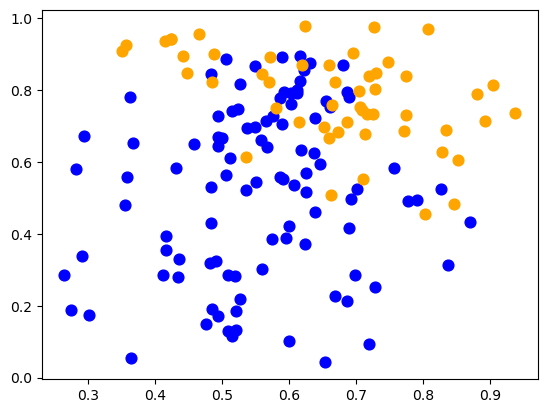

In [7]:
#plot for danceability on the x axis and energy on y axis
# orange means on the playlist and blue is not on the playlist
plt.scatter(aud_feat.loc[aud_feat.binary==0].danceability,
            aud_feat.loc[aud_feat.binary==0].energy,
            c='blue',
            s=60,
            label="0")
plt.scatter(aud_feat.loc[aud_feat.binary==1].danceability,
            aud_feat.loc[aud_feat.binary==1].energy,
            c='orange',
            s=60,
            label="1")

aud_feat

In [8]:
#TODO:
#1.generalize to specifying a random playlist, doesnt need to get recommendation for all playlists at once
#2.create a playlist and test to see if it works to recommend a similar song
#3.create some plots
#4.give an output for the song recommendation
#5.make all names of variables accurate
#6.limit for how many songs can be sent to spotify api
#7.create new notebook to push to github without secret key and whatnot, reading in files
#8.need song identifier when going to all songs, ok just dont include the identifier column